In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, precision_score, recall_score, f1_score

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("central_bank_india.csv", index_col='Date', parse_dates=["Date"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2464 entries, 2024-04-04 to 2014-04-04
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2464 non-null   int64  
 1   Open        2464 non-null   float64
 2   High        2464 non-null   float64
 3   Low         2464 non-null   float64
 4   Close       2464 non-null   float64
 5   Volume      2464 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 134.8+ KB


In [ ]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Volume
0,2024-04-04,66.39,67.00,64.14,64.94,"2,544,505"
1,2024-04-03,63.33,65.89,62.80,65.62,"1,690,023"
2,2024-04-02,63.35,64.20,62.10,63.19,"1,871,660"
3,2024-04-01,60.51,63.85,60.48,63.43,"1,565,080"
4,2024-03-28,57.67,61.65,57.67,59.78,"3,000,674"
...,...,...,...,...,...,...
2459,2014-04-11,51.15,51.70,50.50,51.15,"138,072"
2460,2014-04-10,52.00,52.80,50.70,51.20,"452,400"
2461,2014-04-09,50.70,52.20,50.40,51.90,"229,396"
2462,2014-04-07,50.30,53.50,49.65,50.55,"57,447"


In [ ]:
data.describe()

,Open,High,Low,Close
count,2464.000000,2464.000000,2464.000000,2464.000000
mean,51.046445,51.989298,50.072524,50.914172
std,31.715138,32.250950,31.194346,31.671699
min,10.350000,10.850000,10.040000,10.210000
25%,20.450000,20.900000,20.000000,20.387500
50%,43.860000,44.695000,42.725000,43.620000
75%,77.775000,79.125000,76.000000,77.550000
max,125.000000,125.000000,117.500000,120.400000


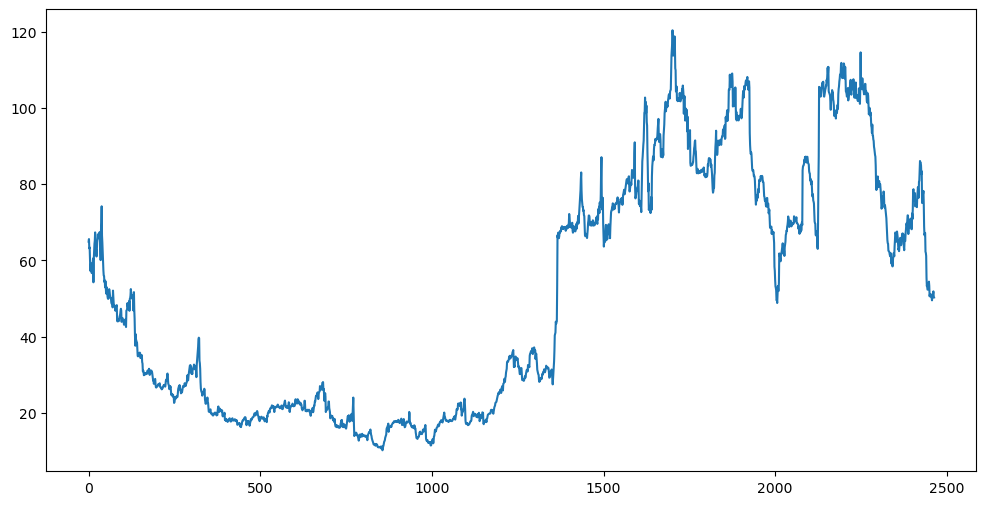

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price')

In [ ]:
# Calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

In [ ]:
# Additional Market Dynamics Attributes
data['MA10'] = data['Close'].rolling(window=10).mean()  # 10-day Moving Average
data['MA50'] = data['Close'].rolling(window=50).mean()  # 50-day Moving Average
data['MACD'] = data['Close'].ewm(span=12, min_periods=0, adjust=False).mean() - data['Close'].ewm(span=26, min_periods=0, adjust=False).mean()  # Moving Average Convergence Divergence (MACD)

# Feature Engineering
data['HighMinusLow'] = data['High'] - data['Low']
data['OpenMinusClose'] = data['Open'] - data['Close']

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.reset_index(drop=True, inplace=True)
data

,Date,Open,High,Low,Close,Volume,RSI,MA10,MA50,MACD,HighMinusLow,OpenMinusClose
0,2024-01-19,53.19,55.00,52.50,54.60,"5,669,806",42.744063,57.249,61.9868,-2.696819,2.50,-1.41
1,2024-01-18,51.98,53.43,49.29,52.78,"2,495,318",26.177024,56.055,61.7436,-2.909723,4.14,-0.80
2,2024-01-17,52.03,52.70,51.03,51.32,"1,469,074",20.318979,54.980,61.4576,-3.159836,1.67,0.71
3,2024-01-16,52.87,54.34,51.75,53.07,"2,397,922",13.293995,54.336,61.2552,-3.180183,2.59,-0.20
4,2024-01-15,52.20,53.80,51.90,52.52,"3,549,495",17.666052,53.842,61.0370,-3.203758,1.90,-0.32
...,...,...,...,...,...,...,...,...,...,...,...,...
2410,2014-04-11,51.15,51.70,50.50,51.15,"138,072",44.186047,50.660,66.9260,-4.585499,1.20,0.00
2411,2014-04-10,52.00,52.80,50.70,51.20,"452,400",35.483871,50.720,66.4550,-4.297190,2.10,0.80
2412,2014-04-09,50.70,52.20,50.40,51.90,"229,396",40.000000,50.790,65.9900,-3.966495,1.80,-1.20
2413,2014-04-07,50.30,53.50,49.65,50.55,"57,447",31.944444,50.770,65.5020,-3.769893,3.85,-0.25


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam


# Prepare the data
X = data[['OpenMinusClose', 'HighMinusLow', 'RSI', 'MA10', 'MA50', 'MACD']]
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)


In [ ]:
X_train

,OpenMinusClose,HighMinusLow,RSI,MA10,MA50,MACD
604,-1.00,1.65,56.989247,20.390,21.4880,-0.156335
2159,-0.40,3.00,37.740385,108.120,104.4560,0.300559
938,-0.49,0.62,35.006974,14.469,15.0310,-0.505271
638,0.95,1.25,38.938053,26.430,23.4440,0.503251
1661,-3.15,6.15,57.123098,115.475,101.6130,3.622613
...,...,...,...,...,...,...
84,-2.03,3.97,50.500653,49.762,46.7576,0.619168
2144,-1.95,3.75,89.655172,107.900,103.8920,2.523128
571,-0.15,3.35,40.449438,22.580,22.1960,0.049833
1197,0.00,0.90,45.833333,33.845,31.3490,0.601547


In [ ]:
# Scale the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.fit_transform(X_test)


In [ ]:
# Split the data into train and test sets
# Reshape the input data for LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))




# LSTM

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
predictions_lstm= model.predict(X_test_reshaped)


r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions_lstm, squared=False)
mae = mean_absolute_error(y_test, predictions_lstm)
mse = mean_squared_error(y_test, predictions_lstm)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")
print(f"RMSE: {rmse}")


Epoch 1/100
46/46 [==============================] - 2s 10ms/step - loss: 3576.3794 - val_loss: 3526.9338
Epoch 2/100
46/46 [==============================] - 0s 4ms/step - loss: 3554.2881 - val_loss: 3501.3357
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 3523.5957 - val_loss: 3462.4905
Epoch 4/100
46/46 [==============================] - 0s 4ms/step - loss: 3477.2593 - val_loss: 3406.5125
Epoch 5/100
46/46 [==============================] - 0s 4ms/step - loss: 3411.8660 - val_loss: 3329.7842
Epoch 6/100
46/46 [==============================] - 0s 5ms/step - loss: 3326.4924 - val_loss: 3235.2947
Epoch 7/100
46/46 [==============================] - 0s 4ms/step - loss: 3224.3552 - val_loss: 3126.1165
Epoch 8/100
46/46 [==============================] - 0s 4ms/step - loss: 3109.2231 - val_loss: 3006.0400
Epoch 9/100
46/46 [==============================] - 0s 4ms/step - loss: 2982.0564 - val_loss: 2873.8250
Epoch 10/100
46/46 [==============================] - 

Epoch 80/100
46/46 [==============================] - 0s 3ms/step - loss: 39.3522 - val_loss: 37.2131
Epoch 81/100
46/46 [==============================] - 0s 3ms/step - loss: 37.8779 - val_loss: 35.9029
Epoch 82/100
46/46 [==============================] - 0s 3ms/step - loss: 36.5545 - val_loss: 34.6595
Epoch 83/100
46/46 [==============================] - 0s 5ms/step - loss: 35.2971 - val_loss: 33.4974
Epoch 84/100
46/46 [==============================] - 0s 5ms/step - loss: 34.1539 - val_loss: 32.4436
Epoch 85/100
46/46 [==============================] - 0s 4ms/step - loss: 33.0518 - val_loss: 31.4159
Epoch 86/100
46/46 [==============================] - 0s 4ms/step - loss: 32.0241 - val_loss: 30.4977
Epoch 87/100
46/46 [==============================] - 0s 4ms/step - loss: 31.0774 - val_loss: 29.6279
Epoch 88/100
46/46 [==============================] - 0s 4ms/step - loss: 30.2148 - val_loss: 28.8267
Epoch 89/100
46/46 [==============================] - 0s 4ms/step - loss: 29.3839 

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10)                680       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 691 (2.70 KB)
Trainable params: 691 (2.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
valid_lstm = pd.DataFrame({'Actual Close': y_test, 'Predicted Close Value': predictions_lstm.flatten()})
valid_lstm


,Actual Close,Predicted Close Value
2327,62.70,61.989742
284,25.55,31.008936
376,18.30,16.543077
2326,63.50,61.256302
689,18.15,19.504784
...,...,...
1440,75.20,72.103088
423,18.05,15.801368
999,17.85,16.998899
1823,105.60,107.383560


In [ ]:
valid_sorted_lstm = valid_lstm.sort_index()
valid_sorted_lstm

,Actual Close,Predicted Close Value
7,50.06,46.783463
13,51.02,44.765728
20,49.20,44.095879
32,48.17,40.569691
35,44.02,38.478268
...,...,...
2395,52.35,58.222515
2404,50.60,53.636623
2405,50.55,51.286137
2411,51.20,47.171288


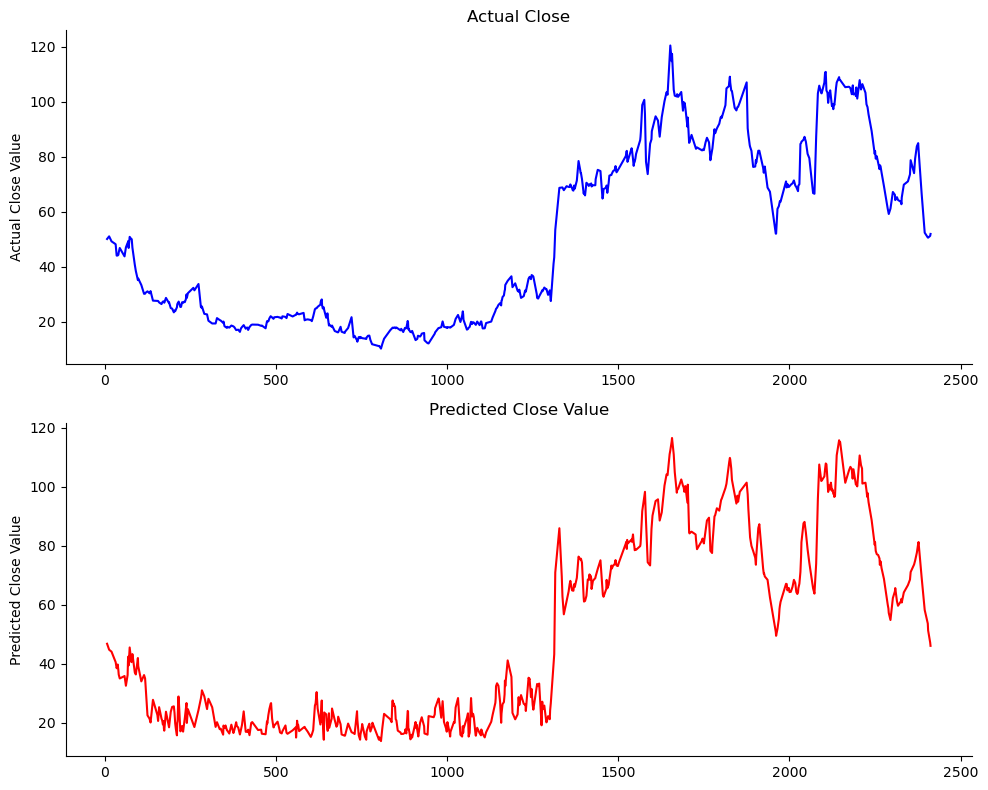

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

valid_sorted_lstm['Actual Close'].plot(ax=ax1, kind='line', title='Actual Close', color='blue')
ax1.set_ylabel('Actual Close Value')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

valid_sorted_lstm['Predicted Close Value'].plot(ax=ax2, kind='line', title='Predicted Close Value', color='red')
ax2.set_ylabel('Predicted Close Value')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

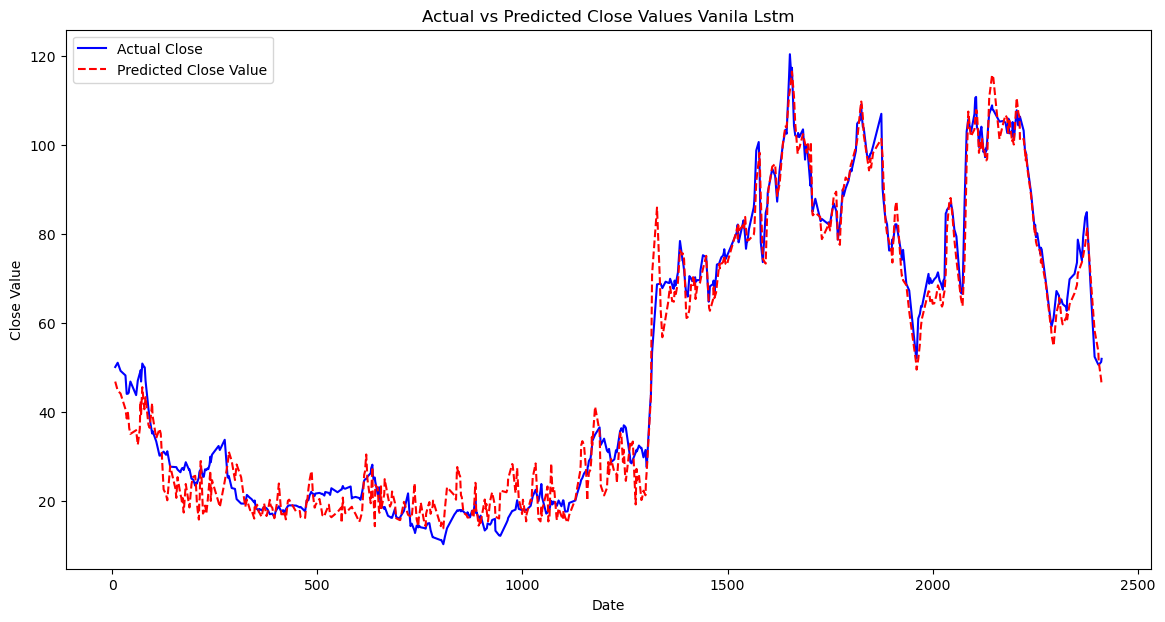

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(valid_sorted_lstm.index, valid_sorted_lstm['Actual Close'], label='Actual Close', color='blue')
plt.plot(valid_sorted_lstm.index, valid_sorted_lstm['Predicted Close Value'], label='Predicted Close Value', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.title('Actual vs Predicted Close Values Vanila Lstm')
plt.legend()
plt.show()


# Bidirectional Lstm

In [ ]:
from tensorflow.keras.layers import Bidirectional

# Build the Bidirectional LSTM model
model_bidirectional = Sequential()
model_bidirectional.add(Bidirectional(LSTM(units=50, activation='relu'), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model_bidirectional.add(Dense(units=1))

# Compile the model
model_bidirectional.compile(optimizer='adam', loss='mse')

# Train the model
history_bidirectional = model_bidirectional.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
predictions_bidirectional = model_bidirectional.predict(X_test_reshaped)

r2_bidirectional = r2_score(y_test, predictions_bidirectional)
rmse_bidirectional = mean_squared_error(y_test, predictions_bidirectional, squared=False)
mae_bidirectional = mean_absolute_error(y_test, predictions_bidirectional)
mse_bidirectional = mean_squared_error(y_test, predictions_bidirectional)

print("Bidirectional LSTM Model Metrics:")
print(f"MAE: {mae_bidirectional}")
print(f"MSE: {mse_bidirectional}")
print(f"R^2: {r2_bidirectional}")
print(f"RMSE: {rmse_bidirectional}")


Epoch 1/100
46/46 [==============================] - 6s 18ms/step - loss: 3555.7197 - val_loss: 3482.6511
Epoch 2/100
46/46 [==============================] - 0s 6ms/step - loss: 3467.6118 - val_loss: 3353.1370
Epoch 3/100
46/46 [==============================] - 0s 6ms/step - loss: 3277.8809 - val_loss: 3079.4780
Epoch 4/100
46/46 [==============================] - 0s 7ms/step - loss: 2922.1106 - val_loss: 2636.1316
Epoch 5/100
46/46 [==============================] - 0s 6ms/step - loss: 2416.5852 - val_loss: 2075.1987
Epoch 6/100
46/46 [==============================] - 0s 6ms/step - loss: 1847.4532 - val_loss: 1511.2054
Epoch 7/100
46/46 [==============================] - 0s 6ms/step - loss: 1328.0052 - val_loss: 1046.7367
Epoch 8/100
46/46 [==============================] - 0s 6ms/step - loss: 933.8718 - val_loss: 719.8636
Epoch 9/100
46/46 [==============================] - 0s 6ms/step - loss: 667.2366 - val_loss: 518.5205
Epoch 10/100
46/46 [==============================] - 0s 7

In [ ]:
valid_bidirectional = pd.DataFrame({'Actual Close': y_test, 'Predicted Close Value': predictions_bidirectional.flatten()})
valid_bidirectional


,Actual Close,Predicted Close Value
2327,62.70,63.278603
284,25.55,25.315573
376,18.30,18.148849
2326,63.50,65.598572
689,18.15,18.553209
...,...,...
1440,75.20,73.337105
423,18.05,17.533831
999,17.85,17.297520
1823,105.60,105.845558


In [ ]:
valid_sorted_bidirectional = valid_bidirectional.sort_index()
valid_sorted_bidirectional

,Actual Close,Predicted Close Value
7,50.06,49.008324
13,51.02,50.037930
20,49.20,48.987186
32,48.17,47.867489
35,44.02,46.053619
...,...,...
2395,52.35,53.505409
2404,50.60,48.798996
2405,50.55,49.425190
2411,51.20,50.387665


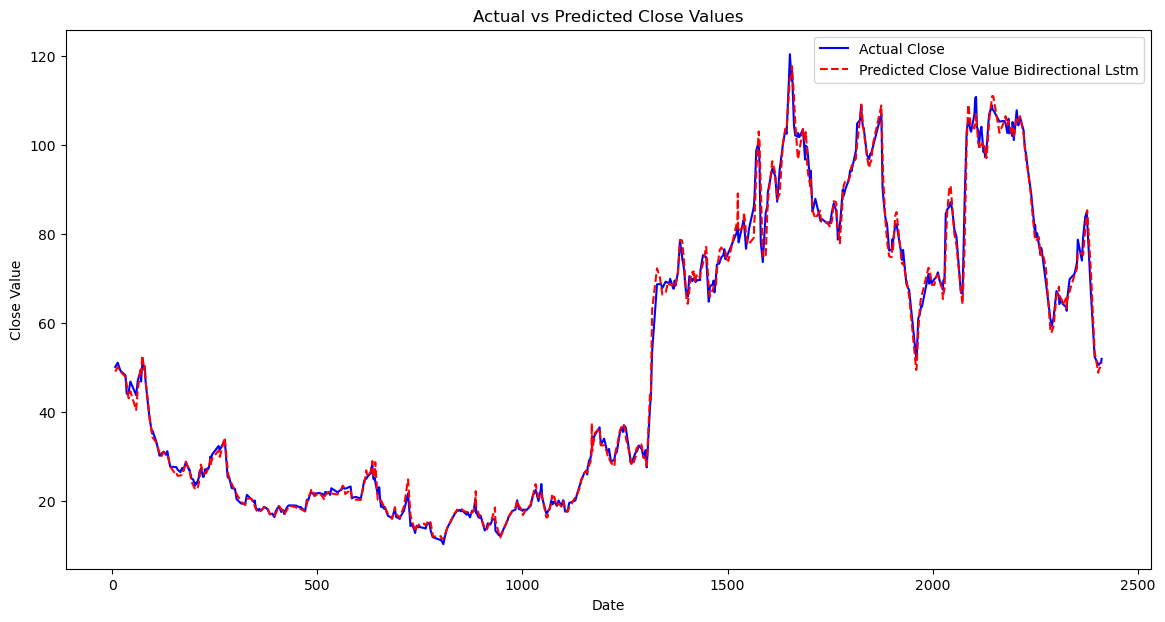

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(valid_sorted_bidirectional.index, valid_sorted_bidirectional['Actual Close'], label='Actual Close', color='blue')
plt.plot(valid_sorted_bidirectional.index, valid_sorted_bidirectional['Predicted Close Value'], label='Predicted Close Value Bidirectional Lstm', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.title('Actual vs Predicted Close Values')
plt.legend()
plt.show()


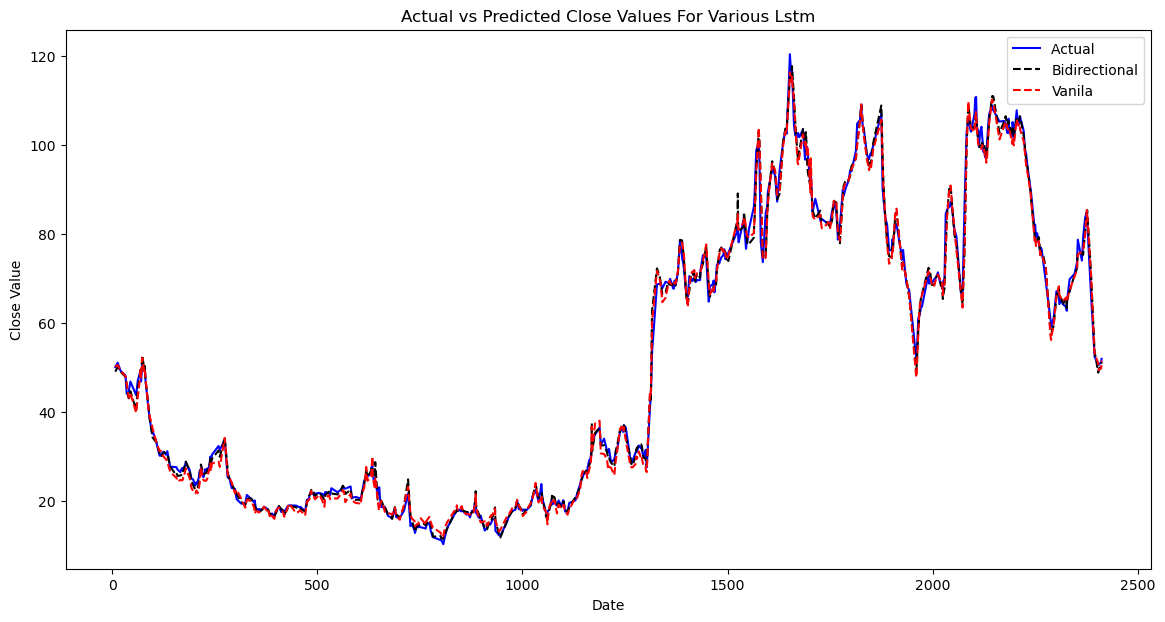

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(valid_sorted_bidirectional.index, valid_sorted_bidirectional['Actual Close'], label='Actual ', color='blue')
plt.plot(valid_sorted_bidirectional.index, valid_sorted_bidirectional['Predicted Close Value'], label='Bidirectional', color='black', linestyle='--')
plt.plot(valid_sorted_lstm.index, valid_sorted_lstm['Predicted Close Value'], label='Vanila', color='red', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Close Value')
plt.title('Actual vs Predicted Close Values For Various Lstm')
plt.legend()
plt.show()


# GRU

In [ ]:
from tensorflow.keras.layers import GRU

# Build the GRU model
model_gru = Sequential()
model_gru.add(GRU(units=10, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model_gru.add(Dense(units=1))

# Compile the model
model_gru.compile(optimizer='adam', loss='mse')

# Train the model
history_gru = model_gru.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
predictions_gru = model_gru.predict(X_test_reshaped)

r2_gru = r2_score(y_test, predictions_gru)
rmse_gru = mean_squared_error(y_test, predictions_gru, squared=False)
mae_gru = mean_absolute_error(y_test, predictions_gru)
mse_gru = mean_squared_error(y_test, predictions_gru)

print("GRU Model Metrics:")
print(f"MAE: {mae_gru}")
print(f"MSE: {mse_gru}")
print(f"R^2: {r2_gru}")
print(f"RMSE: {rmse_gru}")


Epoch 1/50
46/46 [==============================] - 2s 9ms/step - loss: 3587.0432 - val_loss: 3534.9900
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 3560.4360 - val_loss: 3507.7224
Epoch 3/50
46/46 [==============================] - 0s 4ms/step - loss: 3530.1167 - val_loss: 3473.7031
Epoch 4/50
46/46 [==============================] - 0s 4ms/step - loss: 3490.1785 - val_loss: 3429.0540
Epoch 5/50
46/46 [==============================] - 0s 4ms/step - loss: 3439.5847 - val_loss: 3373.9573
Epoch 6/50
46/46 [==============================] - 0s 4ms/step - loss: 3376.9832 - val_loss: 3306.0312
Epoch 7/50
46/46 [==============================] - 0s 4ms/step - loss: 3299.7815 - val_loss: 3221.4731
Epoch 8/50
46/46 [==============================] - 0s 4ms/step - loss: 3203.2722 - val_loss: 3116.2651
Epoch 9/50
46/46 [==============================] - 0s 4ms/step - loss: 3089.5581 - val_loss: 2992.8245
Epoch 10/50
46/46 [==============================] - 0s 4ms/step

In [ ]:
valid_gru = pd.DataFrame({'Actual Close': y_test, 'Predicted Close Value': predictions_gru.flatten()})
valid_gru


In [ ]:
valid_sorted_gru = valid_gru.sort_index()
valid_sorted_gru

,Actual Close,Predicted Close Value
7,50.06,48.196781
13,51.02,50.607044
20,49.20,49.183552
32,48.17,48.842987
35,44.02,46.338562
...,...,...
2395,52.35,53.956055
2404,50.60,49.762016
2405,50.55,49.595627
2411,51.20,50.329498


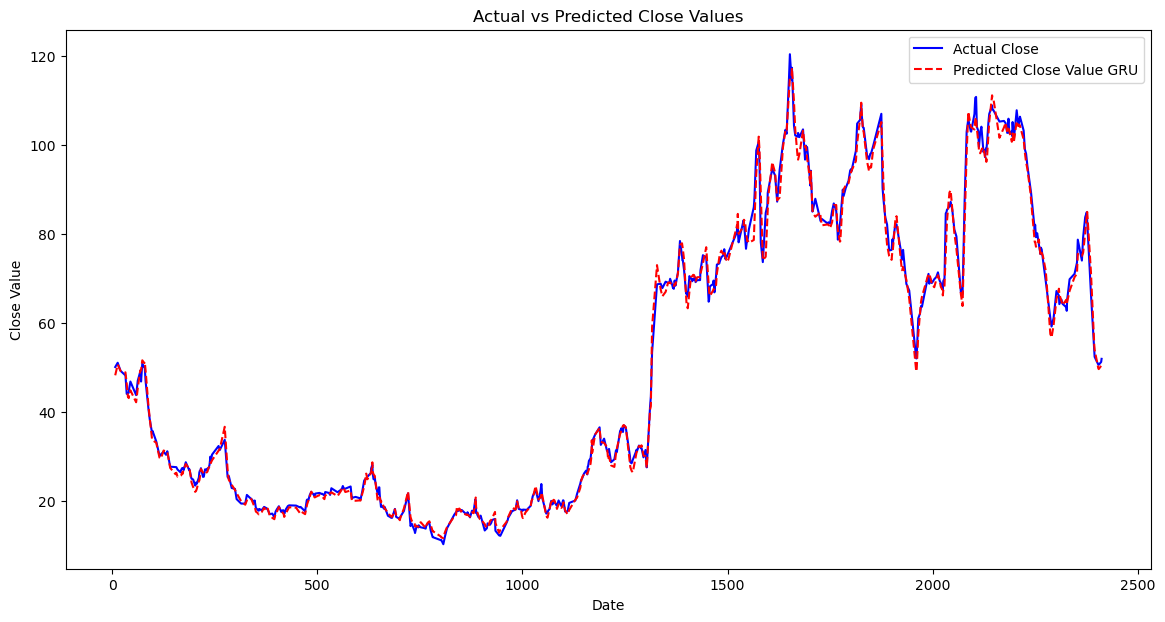

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(valid_sorted_gru.index, valid_sorted_gru['Actual Close'], label='Actual Close', color='blue')
plt.plot(valid_sorted_gru.index, valid_sorted_gru['Predicted Close Value'], label='Predicted Close Value GRU', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.title('Actual vs Predicted Close Values')
plt.legend()
plt.show()


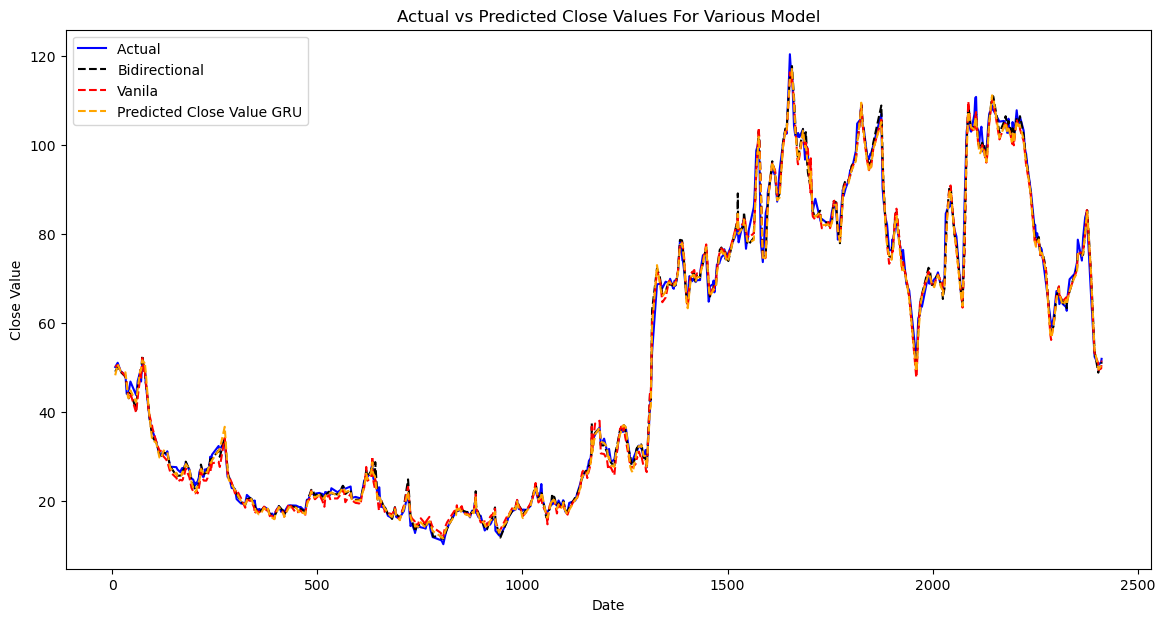

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(valid_sorted_bidirectional.index, valid_sorted_bidirectional['Actual Close'], label='Actual ', color='blue')
plt.plot(valid_sorted_bidirectional.index, valid_sorted_bidirectional['Predicted Close Value'], label='Bidirectional', color='black', linestyle='--')
plt.plot(valid_sorted_lstm.index, valid_sorted_lstm['Predicted Close Value'], label='Vanila', color='red', linestyle='--')
plt.plot(valid_sorted_gru.index, valid_sorted_gru['Predicted Close Value'], label='Predicted Close Value GRU', color='orange', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Close Value')
plt.title('Actual vs Predicted Close Values For Various Model')
plt.legend()
plt.show()


# Metrics

In [ ]:
print('Evaluation Metrics Vanila Lstm\n')

r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions_lstm, squared=False)
mae = mean_absolute_error(y_test, predictions_lstm)
mse = mean_squared_error(y_test, predictions_lstm)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")
print(f"RMSE: {rmse}\n")

print('Evaluation Metrics Bidirectional Lstm\n')

r2_bidirectional = r2_score(y_test, predictions_bidirectional)
rmse_bidirectional = mean_squared_error(y_test, predictions_bidirectional, squared=False)
mae_bidirectional = mean_absolute_error(y_test, predictions_bidirectional)
mse_bidirectional = mean_squared_error(y_test, predictions_bidirectional)

print(f"MAE: {mae_bidirectional}")
print(f"MSE: {mse_bidirectional}")
print(f"R^2: {r2_bidirectional}")
print(f"RMSE: {rmse_bidirectional}\n")


print('Evaluation Metrics GRU\n ')
r2_gru = r2_score(y_test, predictions_gru)
rmse_gru = mean_squared_error(y_test, predictions_gru, squared=False)
mae_gru = mean_absolute_error(y_test, predictions_gru)
mse_gru = mean_squared_error(y_test, predictions_gru)

print(f"MAE: {mae_gru}")
print(f"MSE: {mse_gru}")
print(f"R^2: {r2_gru}")
print(f"RMSE: {rmse_gru}")


Evaluation Metrics Vanila Lstm

MAE: 1.577465293960066
MSE: 4.551046844334256
R^2: 0.9956275614058738
RMSE: 2.133318270754333

Evaluation Metrics Bidirectional Lstm

MAE: 1.2532394790649413
MSE: 3.6821021714925575
R^2: 0.9964070766743696
RMSE: 1.9188804474204633

Evaluation Metrics GRU
 
MAE: 1.28192820782693
MSE: 3.4907234462809975
R^2: 0.9965938202935894
RMSE: 1.868347785151629
